In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

- copied from hands on DA with Pandas notebook

| Parameter | Purpose | Data Type |
| --- | --- | --- |
| `kind` | Determines the plot type | String (`line, bar, barh`) |
| `x`/`y` | Column(s) to plot on the *x*-axis/*y*-axis | String or list |
| `ax` | Draws the plot on the `Axes` object provided | `Axes` |
| `subplots` | Determines whether to make subplots | Boolean |
| `layout` | Specifies how to arrange the subplots | Tuple of `(rows, columns)` |
| `figsize` | Size to make the `Figure` object | Tuple of `(width, height)` | 
| `title` | The title of the plot or subplots | String for the plot title or a list of strings for subplot titles |
| `legend` | Determines whether to show the legend | Boolean |
| `label` | What to call an item in the legend | String if a single column is being plotted; otherwise, a list of strings |
| `style` | `matplotlib` style strings for each item being plotted | String if a single column is being plotted; otherwise, a list of strings |
| `color` | The color to plot the item in | String or red, green, blue tuple if a single column is being plotted; otherwise, a list |
| `colormap` | The colormap to use | String or `matplotlib` colormap object |
| `logx`/`logy`/`loglog` | Determines whether to use a logarithmic scale for the *x*-axis, *y*-axis, or both | Boolean |
| `xticks`/`yticks` | Determines where to draw the ticks on the *x*-axis/*y*-axis | List of values |
| `xlim`/`ylim` | The axis limits for the *x*-axis/*y*-axis | Tuple of the form `(min, max)` |
| `rot` | The angle to write the tick labels at | Integer |
| `sharex`/`sharey` | Determines whether to have subplots share the *x*-axis/*y*-axis | Boolean |
| `fontsize` | Controls the size of the tick labels | Integer |
| `grid` | Turns on/off the grid lines | Boolean |


In [2]:
# load data into dataframes
fb = pd.read_csv('../datasets/fb.csv', index_col='date', parse_dates=True)
eq = pd.read_csv('../datasets/earthquakes.csv')
covid = pd.read_csv('../datasets/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [3]:
fb.head(2)

,high,low,open,close,volume
date,,,,,
2018-01-02,181.58,177.55,177.68,181.42,18151900
2018-01-03,184.78,181.33,181.88,184.67,16886600


In [4]:
eq.head(2)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01,NaN,85.00,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02,NaN,79.00,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...


In [5]:
covid.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.00,Europe,0.00
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.00,Europe,0.00


In [6]:
covid.drop(columns='dateRep', inplace=True)

<Axes: title={'center': 'FB open prices'}, xlabel='date'>

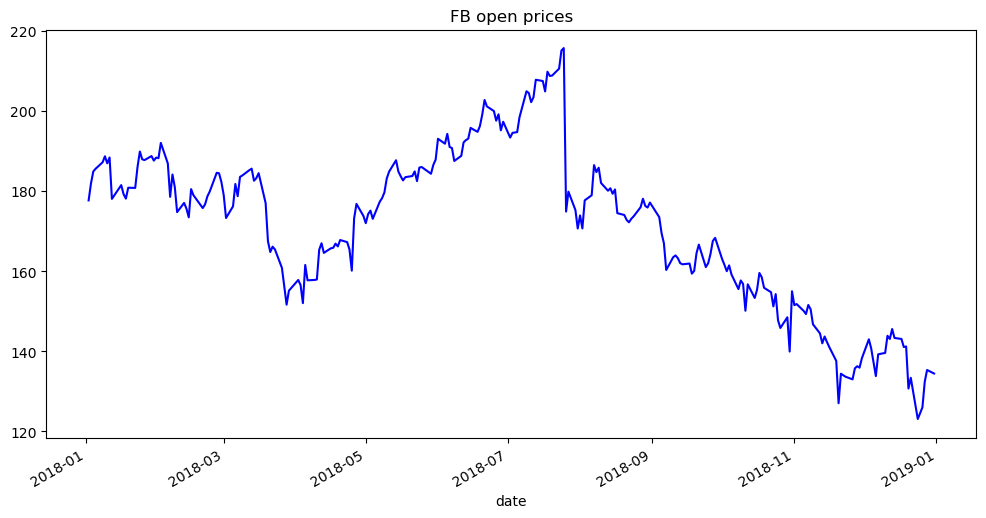

In [7]:
fb.plot(
    kind = 'line',
    y = 'open',
    figsize = (12, 6),
    legend = False,
    title='FB open prices',
    #color = 'green', # either color or style
    style='b-' # 2 arguments with matplotlib: color and linestyle
)

<Axes: title={'center': 'OHLC'}, xlabel='date'>

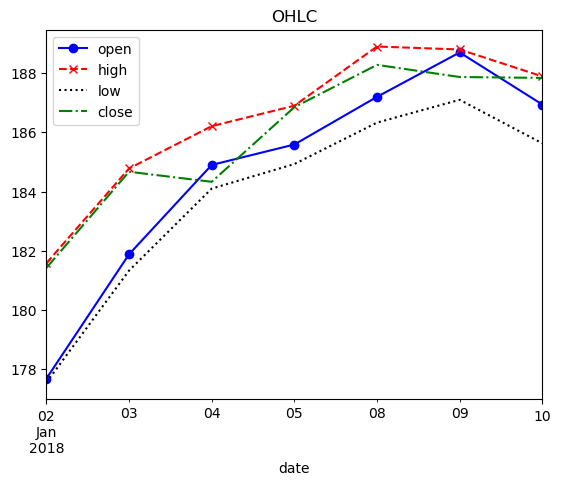

In [8]:
# pass the list of columns to timeseries plot
fb.iloc[:7].plot(
    # kind = 'line', <- default, no need to mention
    y=['open', 'high', 'low', 'close'],
    style=['b-o', 'rx--', 'k:', 'g-.'],
    title = 'OHLC'
)

Pandas can plot all columns in the same cell as above or as a subplot as below.

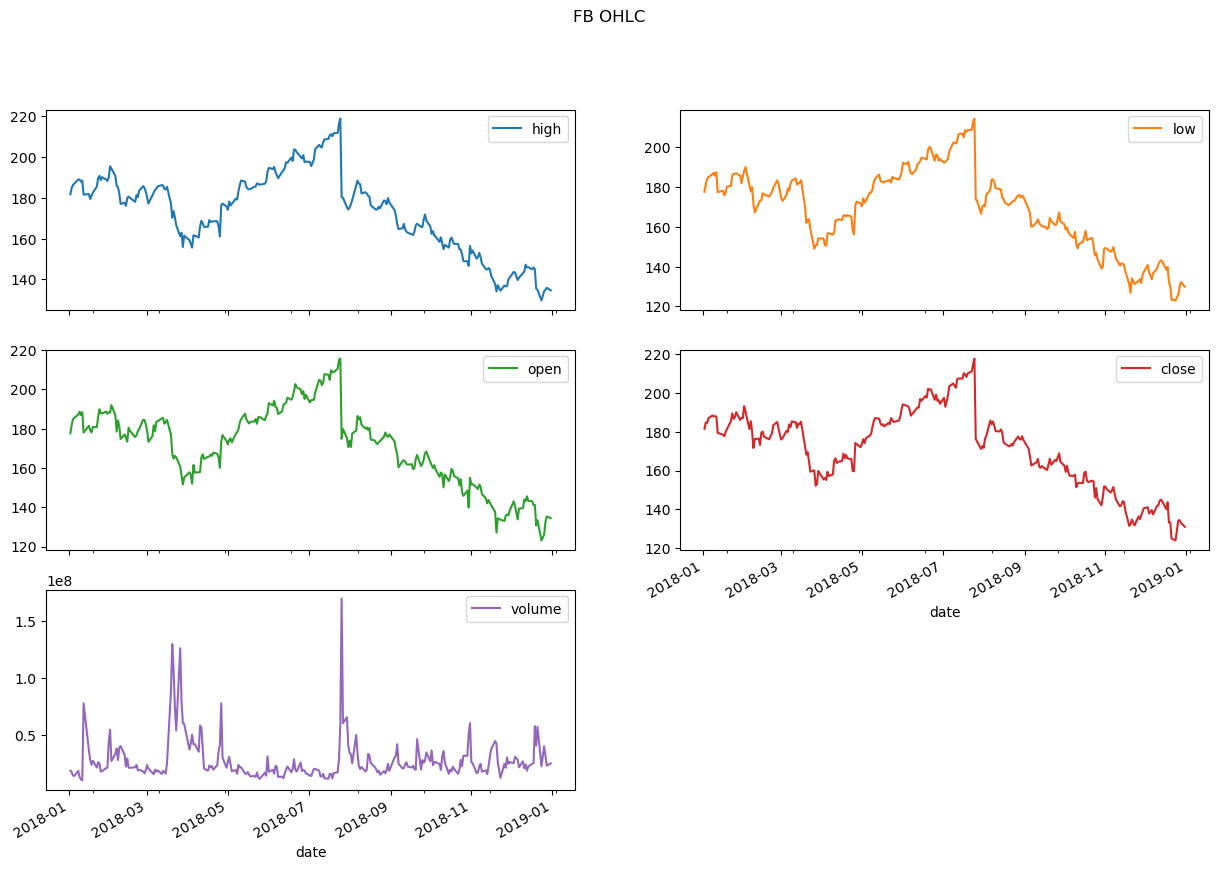

In [9]:
fb.plot(
    subplots=True,
    layout=(3, 2), # (rows, columns)
    figsize = (15, 10),
    title='FB OHLC'
)
plt.show()

More subplots

In [10]:
# covid cases
# 7 days moving average
covid.pivot_table(
    index=covid.index,
    columns='countriesAndTerritories',
    values='cases'
).rolling(7).mean()

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,45.43,156.86,270.00,18.43,57.14,0.00,0.00,10667.86,154.14,85.29,...,0.00,5.57,18.43,549.29,1035.86,2.00,0.00,3.71,109.00,78.43
2020-09-15,45.86,159.14,263.29,25.29,60.43,0.00,0.00,10963.57,160.57,82.57,...,0.00,4.43,17.00,583.57,1031.29,2.00,0.00,3.14,126.29,33.29
2020-09-16,47.86,159.86,256.57,25.29,65.43,0.00,0.00,11062.57,166.57,80.43,...,0.00,5.86,16.43,602.71,1013.14,1.29,0.00,3.14,123.86,26.86


In [11]:
covid_weekly_ma = covid.pivot_table(
    index=covid.index,
    columns='countriesAndTerritories',
    values='cases'
).rolling(7).mean()

In [12]:
covid_weekly_ma.tail(3)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-16,47.86,159.86,256.57,25.29,65.43,0.00,0.00,11062.57,166.57,80.43,...,0.00,5.86,16.43,602.71,1013.14,1.29,0.00,3.14,123.86,26.86
2020-09-17,46.86,158.86,250.00,19.57,76.57,0.00,0.00,11043.43,174.86,85.43,...,0.00,5.86,16.43,603.57,952.14,0.57,0.00,3.00,110.71,24.14
2020-09-18,42.86,155.43,243.71,26.00,93.86,0.00,0.00,10959.86,192.14,80.43,...,0.00,5.29,16.71,581.00,923.00,1.00,0.00,2.86,102.00,25.71


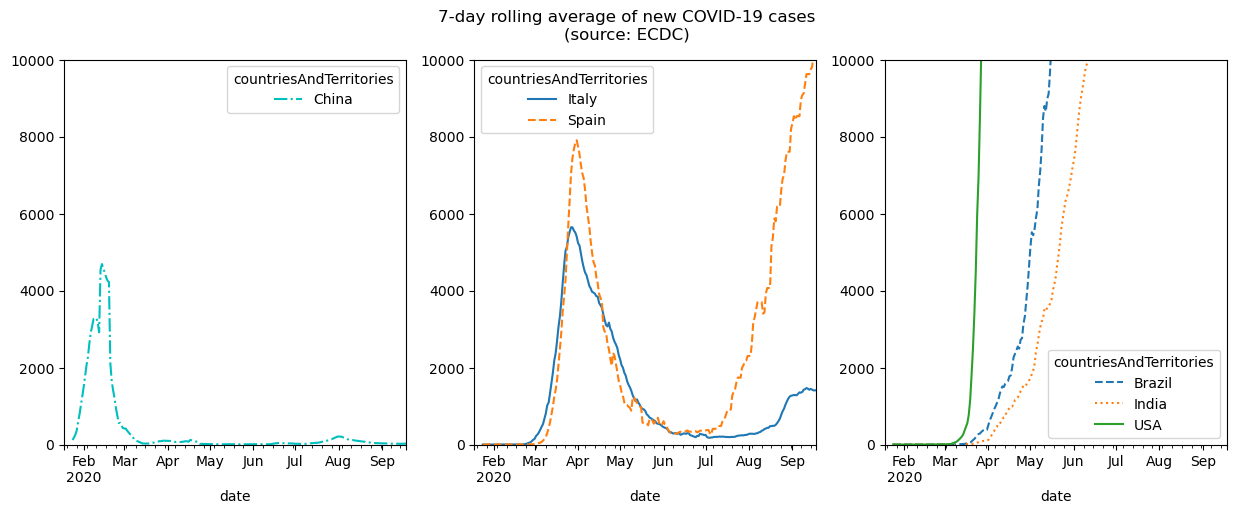

In [13]:
# ylim to make all graphs with the same scale

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('7-day rolling average of new COVID-19 cases\n(source: ECDC)\n\n')

covid_weekly_ma[['China']].plot(ax=axes[0], style='-.c', ylim=(0, 10_000))
covid_weekly_ma[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], ylim=(0, 10_000)
)
covid_weekly_ma[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'], ylim=(0, 10_000))
plt.show()

#### Area plot

In [14]:
# countries that will be on the plot, Italy and Spain combined together
plot_countries = ['China', 'USA', 'India', 'Brazil', 'Italy and Spain', 'Other']
italy_spain = ['Italy', 'Spain']
other_countries = [
    col for col in covid_weekly_ma.columns
    if col not in plot_countries
]

In [15]:
plot_countries + italy_spain

['China',
 'USA',
 'India',
 'Brazil',
 'Italy and Spain',
 'Other',
 'Italy',
 'Spain']

In [16]:
'Italy' in other_countries

True

In [17]:
# create 2 columns for Italy and Spain together
covid_weekly_ma.sort_index(axis=1).assign(
    
    it_sp= lambda x: x[italy_spain].sum(axis=1),
    other= lambda x: x[other_countries].drop(columns=italy_spain).sum(axis=1)
   
).head(2)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe,it_sp,other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00


* `*`  -> unpacking operator for lists, tuples, etc
* `**` -> unpacking operator for dictionaries

In [18]:
# other way to do it:
# we pass ** and a dictionary in order to keep this readable column names for the plot 
covid_weekly_ma.sort_index(axis=1).assign(
    **{
        'Italy and Spain': lambda x: x[italy_spain].sum(axis=1),
        'Other': lambda x: x[other_countries].drop(columns=italy_spain).sum(axis=1)
    }
).head(2)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe,Italy and Spain,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00


In [19]:
# plotting columns only
covid_weekly_ma.sort_index(axis=1).assign(
    **{
        'Italy and Spain': lambda x: x[italy_spain].sum(axis=1),
        'Other': lambda x: x[other_countries].drop(columns=italy_spain).sum(axis=1)
    }
)[plot_countries].tail()

countriesAndTerritories,China,USA,India,Brazil,Italy and Spain,Other
date,,,,,,
2020-09-14,19.86,34794.00,91687.71,27562.00,11185.71,107473.57
2020-09-15,20.00,36307.00,92830.57,28259.43,11233.00,109284.57
2020-09-16,22.29,39785.71,92890.14,31455.71,11545.43,110711.71
2020-09-17,21.43,38738.71,93198.57,31599.14,11623.86,112431.00
2020-09-18,23.86,39604.43,93180.43,30991.43,11937.00,112357.14


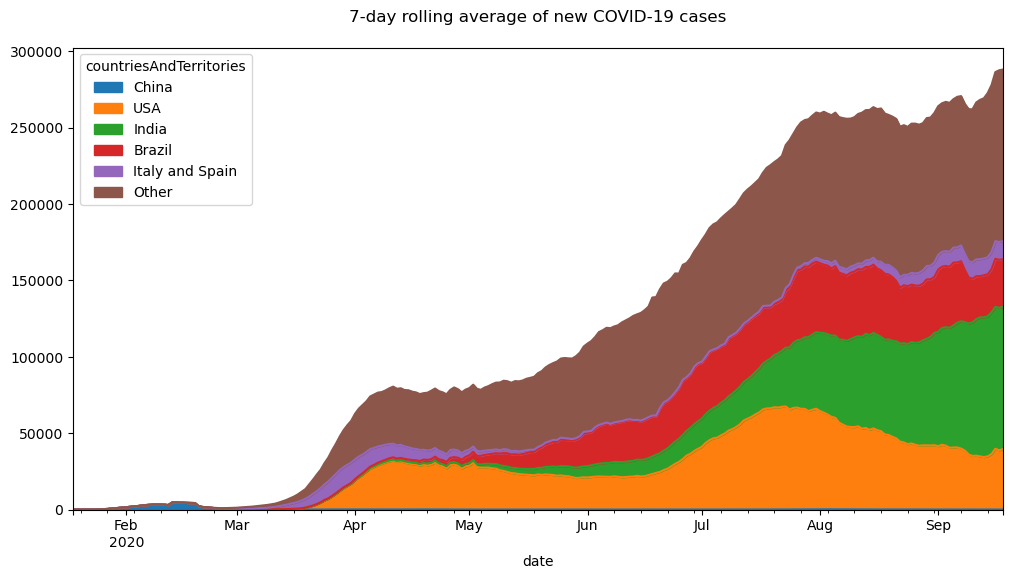

In [20]:
# plot the resulting dataframe
covid_weekly_ma.sort_index(axis=1).assign(
    **{
        'Italy and Spain': lambda x: x[italy_spain].sum(axis=1),
        'Other': lambda x: x[other_countries].drop(columns=italy_spain).sum(axis=1)
    }
)[plot_countries].plot(
    kind='area', 
    figsize=(12, 6),
    title = '7-day rolling average of new COVID-19 cases\n'
)
plt.show()

Same plots for __cumulative sum cases__

In [21]:
covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum()

countriesAndTerritories  date      
Afghanistan              2020-01-18     0
                         2020-01-19     0
                         2020-01-20     0
                         2020-01-21     0
                         2020-01-22     0
                                       ..
Zimbabwe                 2020-09-14    18
                         2020-09-15     5
                         2020-09-16    45
                         2020-09-17    22
                         2020-09-18    35
Name: cases, Length: 42304, dtype: int64

In [22]:
covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum').tail()

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-14,38716.00,11353.00,48254.00,1344.00,3335.00,3.00,95.00,546468.00,45862.00,3046.00,...,509.00,1220.00,1808.00,47620.00,60540.00,1063.00,766.00,2013.00,13539.00,7526.00
2020-09-15,38815.00,11520.00,48496.00,1438.00,3388.00,3.00,95.00,555524.00,45969.00,3060.00,...,509.00,1221.00,1812.00,48192.00,61569.00,1063.00,766.00,2013.00,13720.00,7531.00
2020-09-16,38855.00,11672.00,48734.00,1438.00,3439.00,3.00,95.00,565432.00,46119.00,3152.00,...,509.00,1232.00,1827.00,48776.00,62655.00,1063.00,766.00,2016.00,13819.00,7576.00
2020-09-17,38872.00,11816.00,48966.00,1438.00,3569.00,3.00,95.00,577325.00,46376.00,3328.00,...,509.00,1238.00,1856.00,49385.00,63416.00,1063.00,766.00,2020.00,13887.00,7598.00
2020-09-18,38872.00,11948.00,49194.00,1483.00,3749.00,3.00,95.00,588999.00,46671.00,3382.00,...,509.00,1238.00,1876.00,49994.00,64284.00,1066.00,766.00,2023.00,13928.00,7633.00


In [23]:
covid_cumsum = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

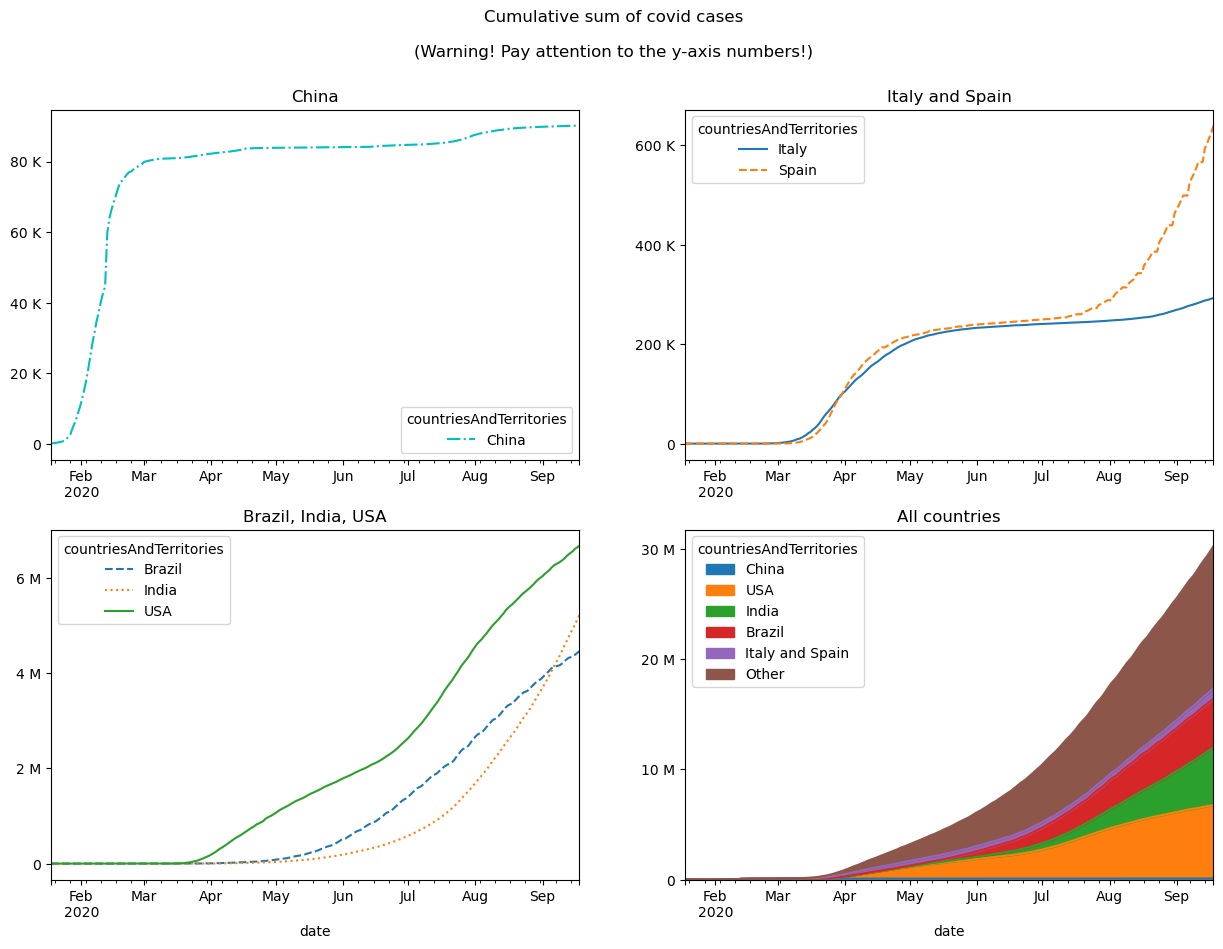

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Cumulative sum of covid cases\n\n(Warning! Pay attention to the y-axis numbers!)\n')
# plot the first subplot. If plotting Series, not a dataframe -> df['China']
# the legend won't appear
covid_cumsum[['China']].plot(
    ax=axes[0, 0],
    style='-.c',
    #sharey=True,
    title='China',
    xlabel=''
)
axes[0, 0].set(yticks=[0, 20_000, 40_000, 60_000, 80_000])
axes[0, 0].set(yticklabels=['0', '20 K', '40 K', '60 K', '80 K'])

# Spain and Italy
covid_cumsum[['Italy', 'Spain']].plot(
    ax=axes[0, 1],
    style = ['-', '--'],
    #sharey=True,
    title='Italy and Spain',
    xlabel=''
)
axes[0, 1].set(yticks=[0, 200_000, 400_000, 600_000])
axes[0, 1].set(yticklabels=['0', '200 K', '400 K', '600 K'])

# USA, Brazil, India
covid_cumsum[['Brazil', 'India', 'USA']].plot(
    ax=axes[1, 0],
    style=['--', ':', '-'],
    title='Brazil, India, USA'
)
axes[1, 0].set(yticks=[0, 2_000_000, 4_000_000, 6_000_000])
axes[1, 0].set(yticklabels=['0', '2 M', '4 M', '6 M'])

# area plot
covid_cumsum.sort_index(axis=1).assign(
    **{
        'Italy and Spain': lambda x: x[italy_spain].sum(axis=1),
        'Other': lambda x: x[other_countries].drop(columns=italy_spain).sum(axis=1)
    }
)[plot_countries].plot(
    ax=axes[1,1],
    kind='area', 
    title = 'All countries'
)
axes[1, 1].set(yticks=[0, 10_000_000, 20_000_000, 30_000_000])
axes[1, 1].set(yticklabels=['0', '10 M', '20 M', '30 M'])


plt.show()

#### Scatterplots with Pandas

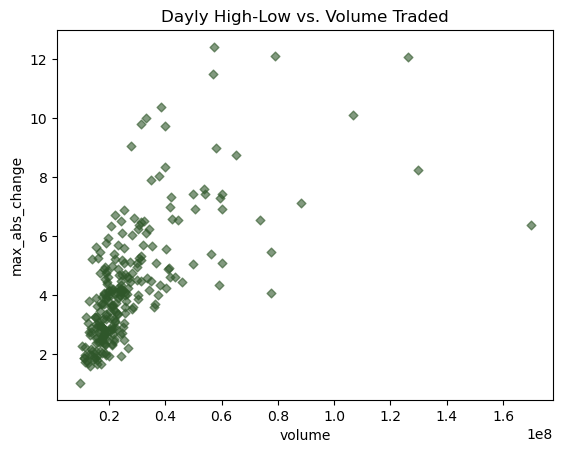

In [25]:
fb.assign(
    max_abs_change = fb.high - fb.low
).plot(
    kind='scatter', 
    x = 'volume',
    y = 'max_abs_change',
    title = 'Dayly High-Low vs. Volume Traded',
    marker = 'D',
    color = '#2f572a',
    alpha=0.6
)
plt.show()
# we can see non-linear realationship

#### To create a logarithmic scale for volume we can try few options:
1. create a new column with `log` of the volume with `np.log`
2. use `log` scale for `x-axis` by passing `logx = True`, or
3. call `plt.xscale(log)`

The scale for 2 and 3 will be the same, while `np.log` will be different. atter plots and the linear relation are the same.

`plot()` in Pandas has 3 __log arguments__: 
- `logx` for x-axis
- `logy` for y-axis
- `loglog` for both

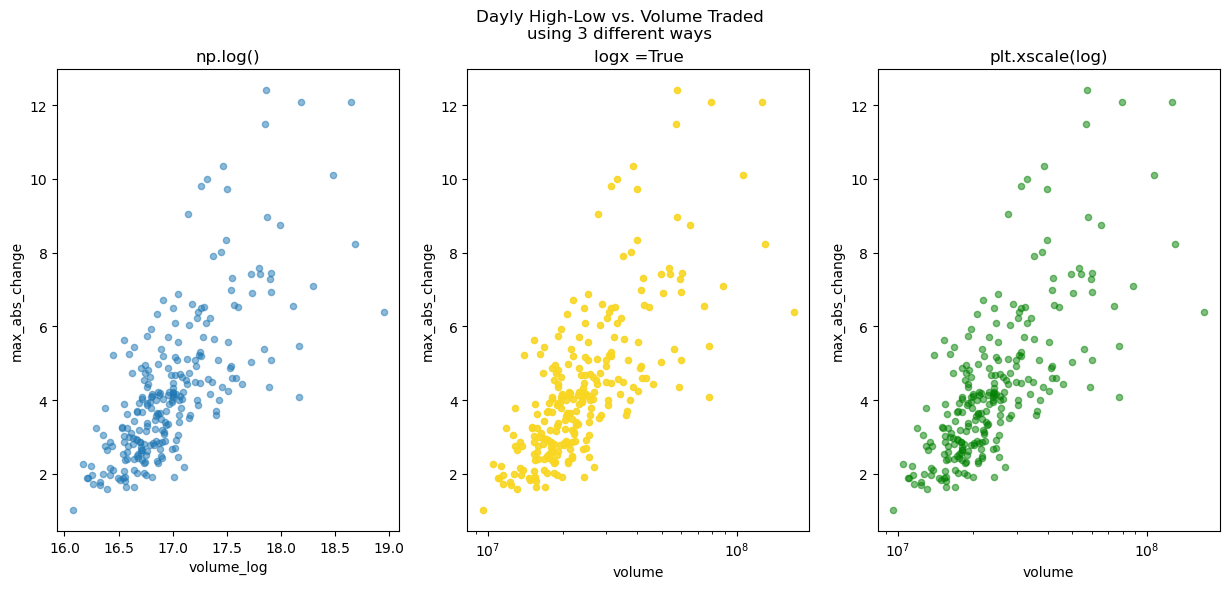

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

plt.suptitle('Dayly High-Low vs. Volume Traded\nusing 3 different ways\n\n')

# option 1
fb.assign(
    max_abs_change = fb.high - fb.low,
    volume_log = np.log(fb.volume)
).plot(
    ax=axes[0],
    kind = 'scatter',
    x = 'volume_log',
    y = 'max_abs_change',
    title = 'np.log()',
    alpha = 0.5
)

# option 2
fb.assign(
    max_abs_change = fb.high - fb.low,
).plot(
    ax=axes[1],
    kind = 'scatter',
    x = 'volume',
    y = 'max_abs_change',
    title = 'logx =True',
    color = '#f8d622',
    alpha = 0.9,
    logx = True
)

# option 3
fb.assign(
    max_abs_change = fb.high - fb.low,
).plot(
    ax=axes[2],
    kind = 'scatter',
    x = 'volume',
    y = 'max_abs_change',
    title = 'plt.xscale(log)',
    alpha = 0.5,
    color = 'green'
)
plt.xscale('log')

plt.show()



### Hexbins
- **two-dimensional histograms**: divides plot into a grid of hexagons and shading them based on concentration

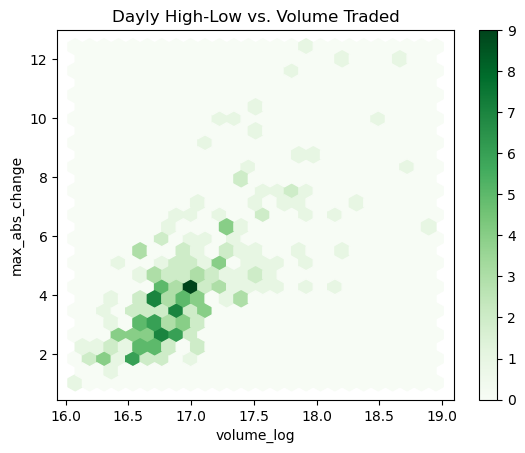

In [38]:
fb.assign(
    max_abs_change = fb.high - fb.low,
    volume_log = np.log(fb.volume)
).plot(
    kind='hexbin',
    x = 'volume_log',
    y = 'max_abs_change',
    colormap =  'Greens',
    # to fix a bug and keep x-axis label add sharex = False
    sharex = False,
    title = 'Dayly High-Low vs. Volume Traded',
    # very important SIZE!!!
    gridsize=25 # 25 hexagons across the x-axis
)
plt.show()
# important! when pick the colormap it should start with white color

### Heatmap - correlation matrix
- visualize the correlation coefficient between variables
- in **pandas** calculate the corr. coefficient
- in **matplotlib** visualize with `plt.matshow()` or `plt.imshow()`

[Documentation](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) for **annotated heatmaps**

In [3]:
# calculate correlation coefficients
fb_corr = fb.assign(
    max_abs_change = fb.high - fb.low,
    volume_log = np.log(fb.volume)
).corr()
fb_corr.head()

,high,low,open,close,volume,max_abs_change,volume_log
high,1.00,1.00,1.00,1.00,-0.18,-0.27,-0.31
low,1.00,1.00,0.99,1.00,-0.24,-0.36,-0.37
open,1.00,0.99,1.00,0.99,-0.21,-0.30,-0.33
close,1.00,1.00,0.99,1.00,-0.21,-0.32,-0.34
volume,-0.18,-0.24,-0.21,-0.21,1.00,0.64,0.92


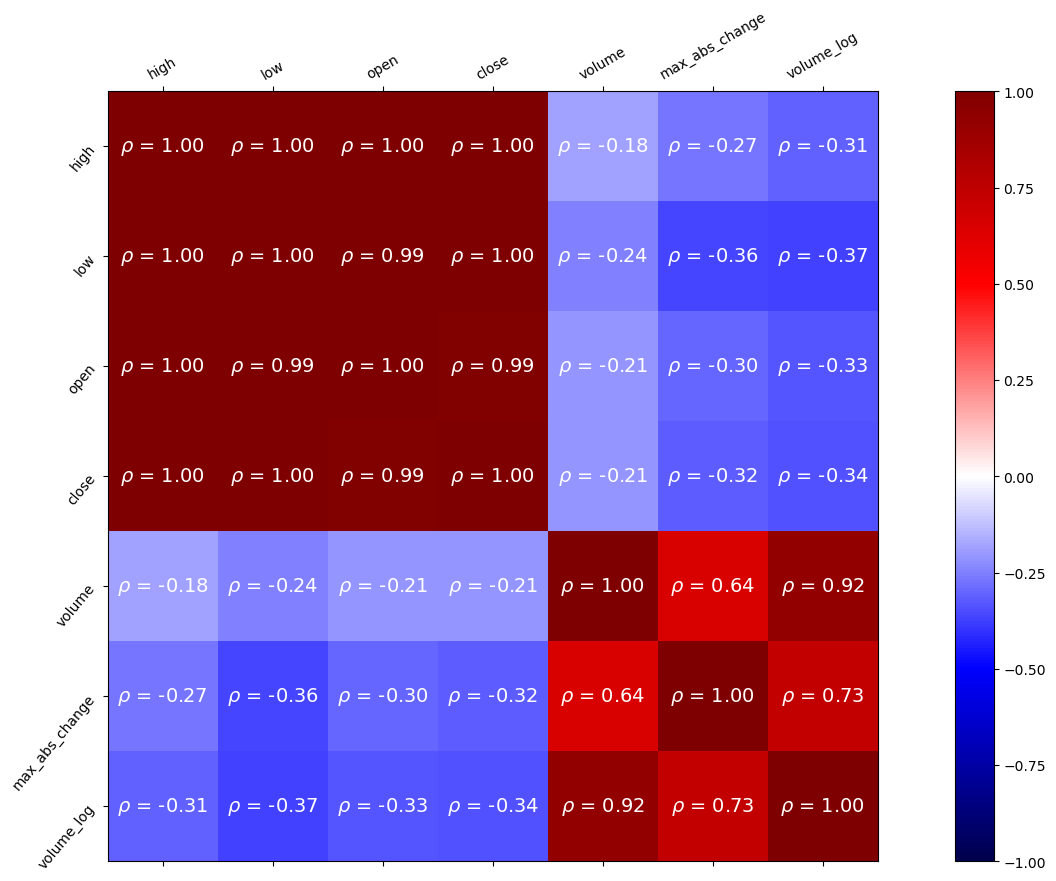

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))

# create a heatmap without any labels, axis info etc, axis go from 0 to 6 (number of columns)
# using imshow returns the same result, but the labels will be in the bottom
im = ax.matshow(fb_corr, cmap='seismic')

# create a colorbar on the left side
im.set_clim(-1, 1)
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
# [''] for the 0 and the rest -> column names
# throws a warning
# ax.set_xticklabels([''] + labels, rotation=45)

# no worning if set_xticks first
# get_xticks() enumerates from -1 to 7, [1:-1] keeps 0 to 6
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_xticklabels(labels, rotation=30)

# repeat the same with yticks
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(labels, rotation=50)

# include the corr coefficient as a text
# np.ndenumerate(arr) -> Multidimensional index iterator

# ((0, 0), 1.0),
# ((0, 1), 0.9951361946013919), etc

for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        # string to print
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        # horizontal and vertical alignments
        ha = 'center',
        va = 'center',
        color = 'white',
        fontsize = 14
    )

plt.show()

In [ ]:
# xticks labels we get with np.ndenumerate(fb_corr)
[Text(-1.0, 1, 'high'),
 Text(0.0, 1, 'low'),
 Text(1.0, 1, 'open'),
 Text(2.0, 1, 'close'),
 Text(3.0, 1, 'volume'),
 Text(4.0, 1, 'max_abs_change'),
 Text(5.0, 1, 'volume_log'),
 Text(6.0, 1, ''),
 Text(7.0, 1, '')]

### Diagonal correlation matrix with Matplotlib

- create a mask with `np.triu`
- use `imshow`(to label on the bottom) or `matshow` (to label on top)
- apply the mask to a dataframe converted into 2D numpy array
- for those who want to save a .0001 of a millisecond -> correct the `for loop`
- correct the slicing on ticks and labels for both axis
- set limits on x-axis and y-axis

**Note:**
- `ax.set_ylim(0.5, 6.5)` flips the matrix and works better with `matshow` where the labels are on the top of the matrix
- for `imshow` we need to reverse the limit values: `ax.set_ylim(6.5, 0.5)`

In [73]:
fb_corr.to_numpy()

array([[ 1.        ,  0.99513619,  0.99564948,  0.99547779, -0.18278277,
        -0.26893804, -0.30544993],
       [ 0.99513619,  1.        ,  0.99440016,  0.99583323, -0.24261679,
        -0.36250932, -0.37044608],
       [ 0.99564948,  0.99440016,  1.        ,  0.98960907, -0.20562373,
        -0.30290141, -0.32939172],
       [ 0.99547779,  0.99583323,  0.98960907,  1.        , -0.210623  ,
        -0.31853739, -0.3374992 ],
       [-0.18278277, -0.24261679, -0.20562373, -0.210623  ,  1.        ,
         0.64287009,  0.92007209],
       [-0.26893804, -0.36250932, -0.30290141, -0.31853739,  0.64287009,
         1.        ,  0.73216562],
       [-0.30544993, -0.37044608, -0.32939172, -0.3374992 ,  0.92007209,
         0.73216562,  1.        ]])

In [8]:
mask = np.triu(np.ones_like(fb_corr, dtype=bool))
mask.shape, fb_corr.shape

((7, 7), (7, 7))

In [74]:
np.ma.masked_where(mask, fb_corr.to_numpy())

masked_array(
  data=[[--, --, --, --, --, --, --],
        [0.9951361946013919, --, --, --, --, --, --],
        [0.9956494785344321, 0.994400163477507, --, --, --, --, --],
        [0.9954777857735776, 0.9958332263035531, 0.9896090736864582, --,
         --, --, --],
        [-0.18278276720874576, -0.24261678907629755,
         -0.20562373063978925, -0.2106230049099241, --, --, --],
        [-0.2689380359247034, -0.36250931716476675, -0.30290140605801585,
         -0.3185373874709493, 0.6428700914447988, --, --],
        [-0.30544992583406394, -0.3704460807504564, -0.3293917171501007,
         -0.3374992001209743, 0.9200720925171468, 0.7321656197630633, --]],
  mask=[[ True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True,  True],
        [False, False, False, False,  True,  True,  True],
        [False, False, False, False

In [48]:
fb_corr.shape

(7, 7)

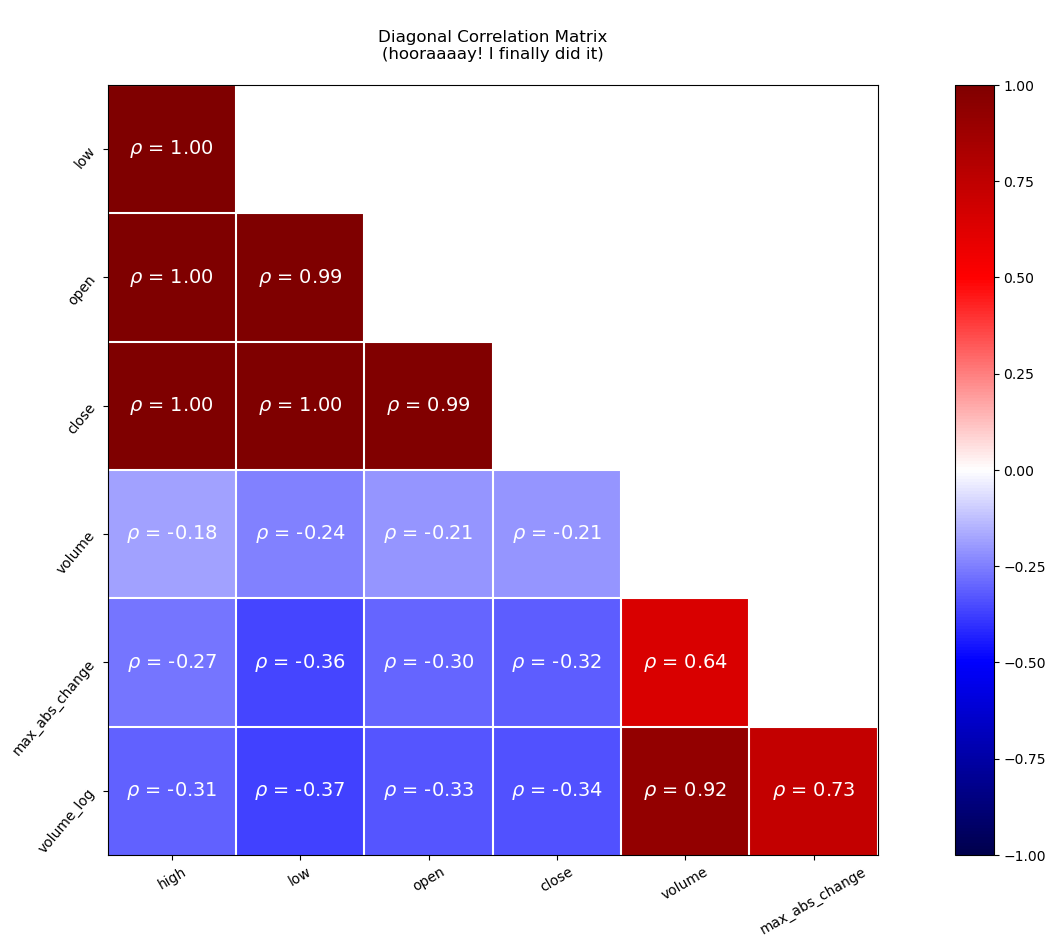

In [85]:
fig, ax = plt.subplots(figsize=(20, 10))


# create a heatmap without any labels, axis info etc, axis go from 0 to 6 (number of columns)
im = ax.imshow(np.ma.masked_where(mask, fb_corr.to_numpy()), cmap='seismic')

# create a colorbar on the left side
im.set_clim(-1, 1)
fig.colorbar(im)

# grid lines doesn't work correct
# ax.grid(color='w', linestyle='-', linewidth=.5)

labels = [col.lower() for col in fb_corr.columns]
# [''] for the 0 and the rest -> column names
# throws a warning
# ax.set_xticklabels([''] + labels, rotation=45)

# no worning if set_xticks first
# get_xticks() enumerates from -1 to 7, [1:-1] keeps 0 to 6

# changed slicing, so it doesn't show empty
ax.set_xticks(ax.get_xticks()[1:-2])
ax.set_xticklabels(labels[:-1], rotation=30)

# repeat the same with yticks
ax.set_yticks(ax.get_yticks()[2:-1])
ax.set_yticklabels(labels[1:], rotation=50)

# include the corr coefficient as a text
# np.ndenumerate(arr) -> Multidimensional index iterator

# ((0, 0), 1.0),
# ((0, 1), 0.9951361946013919), etc

for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        # string to print
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        # horizontal and vertical alignments
        ha = 'center',
        va = 'center',
        color = 'white',
        fontsize = 14
    )

# create grid lines
plt.hlines(y=np.arange(0, 6)+0.5, xmin=-0.5, xmax=5.5, color="white")
plt.vlines(x=np.arange(0, 6)+0.5, ymin=6.5, ymax=0.5, color="white")


# flips the matrix :o)
# ax.set_ylim(0.5, 6.5)

# cut unneeded empty squares by setting ax limits
ax.set_ylim(6.5, 0.5)
ax.set_xlim(-0.5, 5.5)

plt.title('Diagonal Correlation Matrix\n(hooraaaay! I finally did it)\n')
plt.show()

In [4]:
import seaborn as sns

In [127]:
# create custom labels for annotaion
fb_corr_labels =  np.array(round(fb_corr, 2), dtype='<U16')

In [ ]:
fb_corr_labels

array([['1.0', '1.0', '1.0', '1.0', '-0.18', '-0.27', '-0.31'],
       ['1.0', '1.0', '0.99', '1.0', '-0.24', '-0.36', '-0.37'],
       ['1.0', '0.99', '1.0', '0.99', '-0.21', '-0.3', '-0.33'],
       ['1.0', '1.0', '0.99', '1.0', '-0.21', '-0.32', '-0.34'],
       ['-0.18', '-0.24', '-0.21', '-0.21', '1.0', '0.64', '0.92'],
       ['-0.27', '-0.36', '-0.3', '-0.32', '0.64', '1.0', '0.73'],
       ['-0.31', '-0.37', '-0.33', '-0.34', '0.92', '0.73', '1.0']],
      dtype='<U16')

In [ ]:
# add text to each numer
for i in range(0, len(fb_corr_labels)):
    fb_corr_labels[i] = [fr'$\rho$ = ' + s for s in fb_corr_labels[i]]
    print(label)

['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33', '$\\rho$ = -0.34', '$\\rho$ = 0.92', '$\\rho$ = 0.73', '$\\rho$ = 1.0']
['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33', '$\\rho$ = -0.34', '$\\rho$ = 0.92', '$\\rho$ = 0.73', '$\\rho$ = 1.0']
['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33', '$\\rho$ = -0.34', '$\\rho$ = 0.92', '$\\rho$ = 0.73', '$\\rho$ = 1.0']
['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33', '$\\rho$ = -0.34', '$\\rho$ = 0.92', '$\\rho$ = 0.73', '$\\rho$ = 1.0']
['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33', '$\\rho$ = -0.34', '$\\rho$ = 0.92', '$\\rho$ = 0.73', '$\\rho$ = 1.0']
['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33', '$\\rho$ = -0.34', '$\\rho$ = 0.92', '$\\rho$ = 0.73', '$\\rho$ = 1.0']
['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33', '$\\rho$ = -0.34', '$\\rho$ = 0.92', '$\\rho$ = 0.73', '$\\rho$ = 1.0']


In [ ]:
fb_corr_labels

array([['$\\rho$ = 1.0', '$\\rho$ = 1.0', '$\\rho$ = 1.0',
        '$\\rho$ = 1.0', '$\\rho$ = -0.18', '$\\rho$ = -0.27',
        '$\\rho$ = -0.31'],
       ['$\\rho$ = 1.0', '$\\rho$ = 1.0', '$\\rho$ = 0.99',
        '$\\rho$ = 1.0', '$\\rho$ = -0.24', '$\\rho$ = -0.36',
        '$\\rho$ = -0.37'],
       ['$\\rho$ = 1.0', '$\\rho$ = 0.99', '$\\rho$ = 1.0',
        '$\\rho$ = 0.99', '$\\rho$ = -0.21', '$\\rho$ = -0.3',
        '$\\rho$ = -0.33'],
       ['$\\rho$ = 1.0', '$\\rho$ = 1.0', '$\\rho$ = 0.99',
        '$\\rho$ = 1.0', '$\\rho$ = -0.21', '$\\rho$ = -0.32',
        '$\\rho$ = -0.34'],
       ['$\\rho$ = -0.18', '$\\rho$ = -0.24', '$\\rho$ = -0.21',
        '$\\rho$ = -0.21', '$\\rho$ = 1.0', '$\\rho$ = 0.64',
        '$\\rho$ = 0.92'],
       ['$\\rho$ = -0.27', '$\\rho$ = -0.36', '$\\rho$ = -0.3',
        '$\\rho$ = -0.32', '$\\rho$ = 0.64', '$\\rho$ = 1.0',
        '$\\rho$ = 0.73'],
       ['$\\rho$ = -0.31', '$\\rho$ = -0.37', '$\\rho$ = -0.33',
        '$\\rho$ = -0.34'

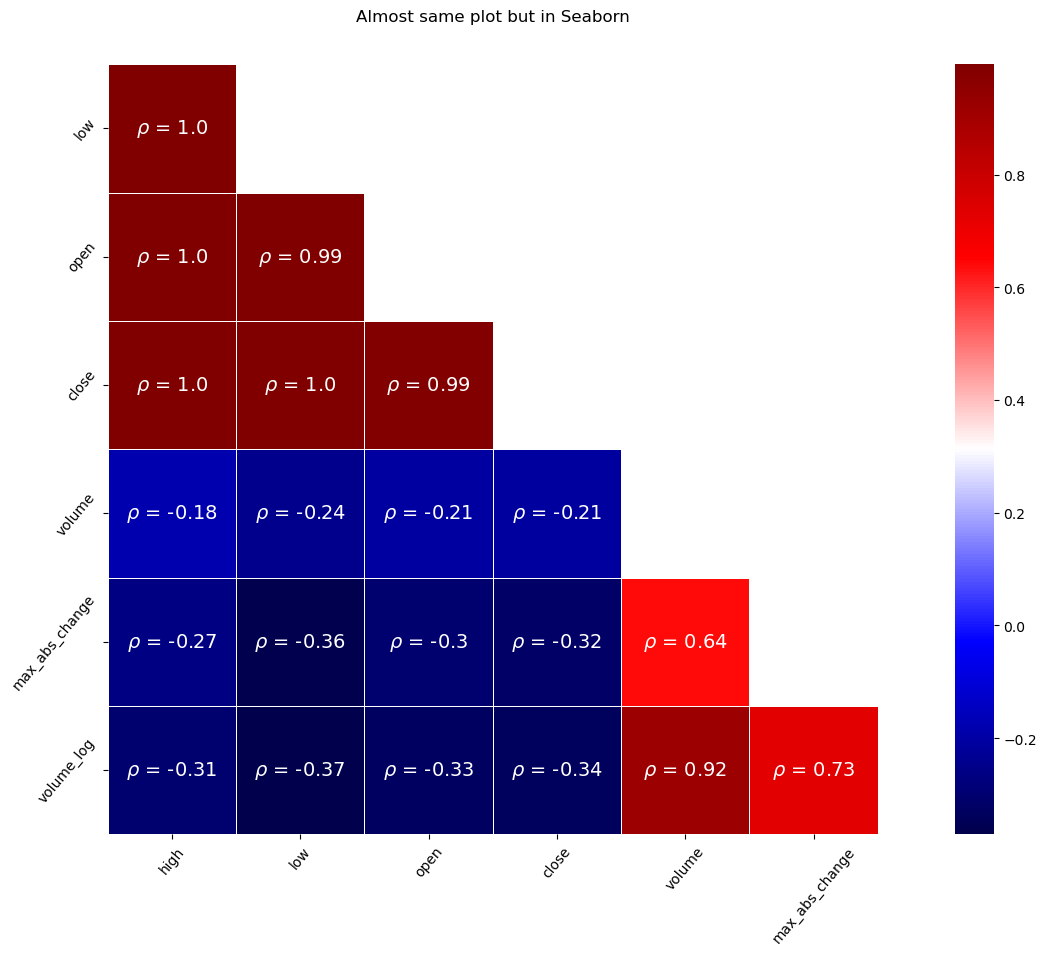

In [171]:
plt.figure(figsize=(20,10))
sns.heatmap(
    fb_corr,
    cmap = 'seismic',
    mask = mask,
    square = True,
    # annot = True will put just numbers from a dataframe
    # here we apply custom annotation
    annot = fb_corr_labels,
    # fmt to make custom annotation work
    fmt = '',
    annot_kws = {'fontsize':14},
    linewidth = .5
    )
plt.xlim(0, 6)
plt.ylim(7, 1)
plt.xticks(rotation=50)
plt.yticks(rotation=50)
plt.title('Almost same plot but in Seaborn\n\n')
plt.show()



In [114]:
np.array(['adghgf', 'b2435', '$\rho$ = '])

array(['adghgf', 'b2435', '$\rho$ = '], dtype='<U8')